# **Comparar Algoritmos**

# _Objetivo_

- Realizar entrenamiento para los tipos de modelos.
- Realizar Stratified K-Fold Cross-Validation (Validación cruzada estratificada de K particiones).
- Realizar K-Fold Cross-Validation (Validación cruzada estratificada de K particiones).
- Realizar entrenamiento y prediccion en cada kfold.
- Realizar prediccion sobre el test del entrenamiento, asi obtener el mejor modelo.
- Revisar los resultados obtenidos.
- Conclusion


# _Liberias_


In [1]:
import numpy as np  # Importa la biblioteca numpy para operaciones numéricas eficientes
import pandas as pd  # Importa la biblioteca pandas para el análisis y manipulación de datos
import matplotlib.pyplot as plt  # Importa la biblioteca matplotlib para visualización de datos
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import seaborn as sns  # Importa la biblioteca seaborn para visualización de datos avanzada

import warnings  # Importa la biblioteca warnings para manejar advertencias
from sys import path  # Importa la biblioteca sys para manejar rutas del sistema
import os  # Importa la biblioteca os para interactuar con el sistema operativo

# Itera sobre los archivos en el directorio "../resources/" e imprime sus rutas
for dirname, _, filenames in os.walk("../../resources/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

path.append(os.path.realpath("../../"))  # Agrega la ruta "../" al path del sistema

from custom import functions  # Importa un módulo personalizado llamado "functions"

warnings.filterwarnings(
    "ignore"
)  # Ignora las advertencias durante la ejecución del programa

../../resources/allColProSol.xlsx
../../resources/dataset_a_2021.csv
../../resources/dataset_a_2021c2.csv
../../resources/dataset_a_2021v1.xlsx
../../resources/dataset_unab_ORIGINAL SIN P1.csv
../../resources/dataset_unab_P1.csv
../../resources/exitoFallidoEnviosProgramaSol.xlsx
../../resources/exitoFallidoProgramaSol.xlsx
../../resources/exitosoFallidosEnviosAllColProSol.xlsx
../../resources/exitosoFallidosEnviosAllColSol.xlsx
../../resources/exitososFallidosEnviosSol.xlsx
../../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../../resources/sinColCeroExitosoFallidosSol.xlsx
../../resources/v2_hitosExitoFalloColESol1.csv
../../resources/v2_hitosExitoFalloColESol1Prograna.csv
../../resources/v2_hitosExitoFalloSol1Programa.csv
../../resources/causalidad\causalidad.dot
../../resources/causalidad\causalidad.png
../../resources/causalidad\causalidad_e29.dot
../../resources/causalidad\graph_causal_model_e29.png
../../resources/causal

# _Carga DataFrame_


In [2]:
df = pd.read_csv(
    "../../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True
)

# _Normalizacion de variables_


In [3]:
# Convertir la columna "sol1" a números de punto flotante
df["sol1"] = df["sol1"].astype(float)
df["exitosos"] = df["exitosos"].astype(int)
df["fallidos"] = df["fallidos"].astype(int)
df["hito1"] = df["hito1"].astype(int)
df["hito2"] = df["hito2"].astype(int)

In [4]:
df.describe()

,hito1,hito2,exitosos,fallidos,e0,e1,e2,e3,e4,e5,...,e44,e45,e46,e47,e48,e49,e50,e51,e52,sol1
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.0,...,839.000000,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.000000
mean,13.353993,0.168057,7.476758,11.287247,0.505364,0.009535,0.0,0.352801,0.734207,0.0,...,0.010727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.642789
std,10.370917,1.929950,5.361101,8.432787,0.500269,0.097239,0.0,0.478126,0.442018,0.0,...,0.103076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.832625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,3.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.200000
50%,13.000000,0.000000,7.000000,10.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.700000
75%,20.000000,0.000000,11.000000,16.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.100000
max,42.000000,32.000000,28.000000,47.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000


# _Transformacion y generacion de Columnas_


In [5]:
# creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df["aprobado"] = df.apply(lambda x: functions.set_in_aprobado_nota(x["sol1"]), axis=1)

# revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


# _Selección de características y variable objetivo para los modelos de clasificacion_


In [6]:
# Selección de características y variable objetivo para los modelos de clasificacion.
y = df["aprobado"]
X = df[
    ['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52']
]

# **Modelos de clasificacion**


In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba usando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

# _Descripcion de configuraciones utilizadas_

`DecisionTreeClassifier`

- `min_samples_split:` (cantidad mínima de muestras para dividir): Se establece en 10, lo que indica que se requiere un mínimo de 10 muestras en un nodo para que se realice una división.
- `min_samples_leaf:` (cantidad mínima de muestras en una hoja): Se establece en 5, lo que significa que se requiere un mínimo de 5 muestras en una hoja para que se considere como una hoja válida.

`LogisticRegression`

- `penalty:` (penalización) Se establece en "l2", lo que significa que se utiliza la regularización L2 (ridge) para evitar el sobreajuste.
- `c:` (inverso de la fuerza de regularización) Se establece en 1.0, lo que indica una regularización moderada.
- `solver:` (solucionador) Se establece en "lbfgs", que es un algoritmo de optimización utilizado para ajustar el modelo.
- `max_iter:` (máximo número de iteraciones) Se establece en 150, lo que indica el número máximo de iteraciones permitidas para la convergencia del modelo.

`RandomForestClassifier`

- `max_depth` (máxima profundidad del árbol): Se establece en 10, lo que limita la profundidad máxima de los árboles en el bosque.
- `min_samples_split` (cantidad mínima de muestras para dividir): Se establece en 10, lo que indica que se requiere un mínimo de 10 muestras en un nodo para que se realice una división.
- `min_samples_leaf` (cantidad mínima de muestras en una hoja): Se establece en 5, lo que significa que se requiere un mínimo de 5 muestras en una hoja para que se considere como una hoja válida.
- `random_state` (semilla para la generación de números aleatorios): Se establece en 1502, lo que garantiza la reproducibilidad de los resultados.
- `n_estimators` (número de estimadores): Se establece en 500, lo que indica el número de árboles en el bosque.

`XGBClassifier`

- `learning_rate` (tasa de aprendizaje): Se establece en 0.1, lo que controla la velocidad de aprendizaje del algoritmo.
- `max_depth` (máxima profundidad del árbol): Se establece en 10, lo que limita la profundidad máxima de los árboles.
- `n_estimators` (número de estimadores): Se establece en 150, lo que determina el número de árboles en el modelo.
- `subsample`: Se establece en 1.0, lo que indica que se utilizan todas las muestras en cada árbol.


In [8]:
# Definir los modelos de Clasificacion
models_clasificacion = [
    DecisionTreeClassifier(
        min_samples_split=10,
        min_samples_leaf=5,
    ),
    LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=150),
    RandomForestClassifier(
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=1502,
        n_estimators=500,
    ),
    XGBClassifier(learning_rate=0.1, max_depth=10, n_estimators=150, subsample=1.0),
]

# _Aplicando StratifiedKfold y Entrenamiento_


In [9]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Crear un diccionario para almacenar los resultados de las métricas para cada modelo
results_train = {}

# Calcular las métricas utilizando cross_validate
for model in models_clasificacion:
    model_name = model.__class__.__name__
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    results_train[model_name] = {
        metric: scores['test_' + metric] for metric in scoring
    }

# _Realizar predicciones utilizando el mejor modelo sobre test_


# _Grafico Comparación de Métricas de Rendimiento (Conjunto de Entrenamiento) Modelos de Clasificación_


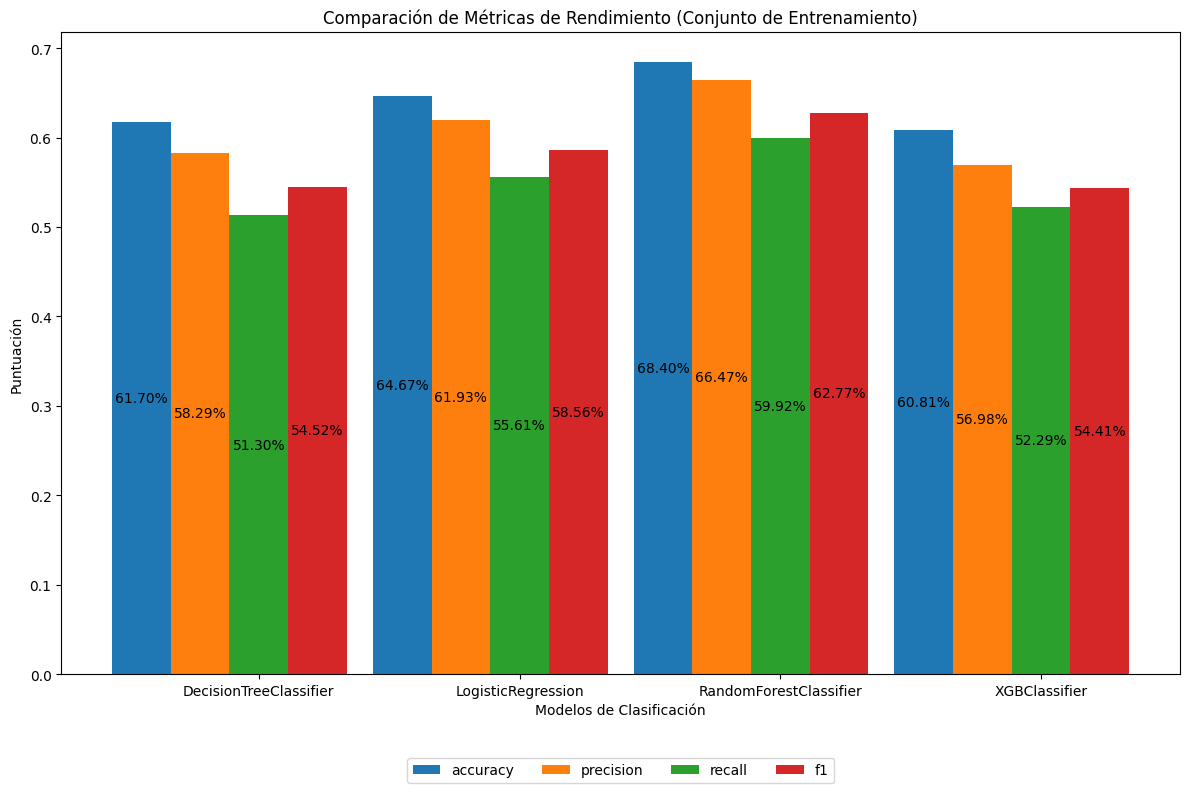

In [10]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(models_clasificacion))
width = 0.225

model_names = [model.__class__.__name__ for model in models_clasificacion]

for i, metric in enumerate(scoring.keys()):
    scores = [
        np.mean(results_train[model_name][metric]) for model_name in model_names
    ]
    bars = ax.bar(x + i * width, scores, width, label=metric)
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,  # Cambio aquí para colocar el texto en el centro
            f"{height:.2%}",
            ha="center",
            va="center",
            color="black"  # Cambio aquí para que el texto sea blanco y visible en el centro de la barra
        )

ax.set_xticks(x + len(scoring.keys()) * width / 2)
ax.set_xticklabels(model_names)
plt.xlabel("Modelos de Clasificación")
plt.ylabel("Puntuación")
plt.title("Comparación de Métricas de Rendimiento (Conjunto de Entrenamiento)")
plt.legend(loc="center", bbox_to_anchor=(0.5, -0.15), ncol=len(scoring.keys()))
plt.tight_layout()
plt.show()

# _Comparación de Métricas entre Modelos_

`Accuracy (Precisión)`:
El accuracy, o precisión, es una métrica que mide la proporción de instancias clasificadas correctamente sobre el total de instancias en los datos de prueba. En otras palabras, es la capacidad del modelo para predecir correctamente tanto las instancias positivas como las negativas. Un valor de accuracy alto indica un buen rendimiento general del modelo en la clasificación.

- `Fórmula:
Accuracy = (Verdaderos Positivos + Verdaderos Negativos) / Total de instancias`

`Precision (Precisión)`:
La precision es una métrica que mide la proporción de instancias clasificadas como positivas que son realmente positivas. Es la capacidad del modelo para evitar hacer falsas afirmaciones de que una instancia pertenece a la clase positiva cuando no lo hace. Una precision alta indica que el modelo tiene una baja tasa de falsos positivos.

- `Fórmula:
Precision = Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos)`

`Recall (Recall o Sensibilidad)`:
El recall, también conocido como sensibilidad o tasa de verdaderos positivos, mide la proporción de instancias positivas que son correctamente identificadas por el modelo. Es la capacidad del modelo para detectar y clasificar correctamente las instancias positivas. Un recall alto indica que el modelo tiene una baja tasa de falsos negativos.

- `Fórmula:
Recall = Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)`

`F1 Score`:
El F1 score es una métrica que combina la precision y el recall en una sola medida. Es la media armónica de la precision y el recall, y proporciona una evaluación equilibrada del rendimiento del modelo. El F1 score es especialmente útil cuando hay un desequilibrio entre las clases o cuando se desea tener un equilibrio entre la precision y el recall.

- `Fórmula:
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)`

`Stratified K-Fold Cross-Validation (Validación cruzada estratificada de K particiones)`:
La validación cruzada estratificada de K particiones, o Stratified K-Fold CV, es una variante de K-Fold CV que tiene en cuenta la distribución de las clases en los datos al realizar la partición. En lugar de realizar la partición de forma aleatoria, Stratified K-Fold CV garantiza que la proporción de clases en cada partición sea lo más similar posible a la proporción de clases en el conjunto de datos original. Esto es especialmente útil cuando hay un desequilibrio entre las clases en los datos.


# _Grafico de resultados mejor modelo Mean y R2_


# **Análisis de los resultados del gráfico de Clasificación**

En este trabajo de investigación, se realizó un análisis de clasificación comparando diferentes modelos. Los resultados obtenidos revelan que el modelo de clasificación RandomForestClassifier logró un mejor desempeño en términos de equilibrio F1 con un 62.53%, recall con un 58.90%, precisión con un 67.61% y exactitud con un 68.26% en comparación con los otros modelos evaluados.

**Conclusión:** Con base en los resultados obtenidos, se puede concluir que el modelo RandomForestClassifier es el más adecuado para problemas de clasificación.

- El mejor modelo en la validación fue: RandomForestClassifier 63.85%
- Resultados del mejor modelo en el conjunto de prueba:
  - Mean Squared Error: 36.3%
  - R2 Score: -45.3%


# **Modelos de Regresion**


`LinearRegression`:

Es un modelo de regresión lineal que busca establecer una relación lineal entre las características y la variable objetivo continua.
Se basa en ajustar una línea recta a los datos que minimiza la suma de los errores cuadráticos.
Estima los coeficientes de las características para predecir los valores de la variable objetivo.

- `positive` (positividad): Se establece en True, lo que indica que los coeficientes del modelo de regresión lineal se forzarán a ser positivos.
- `fit_intercept` (ajuste de intersección): Se establece en True, lo que significa que se calculará la intersección (ordenada al origen) en el modelo de regresión lineal.

`DecisionTreeRegressor`:

Es un modelo de regresión basado en árboles de decisión.
Divide recursivamente el espacio de características en subespacios más pequeños para predecir los valores de las muestras.
Cada nodo interno representa una pregunta o prueba sobre una característica, y las hojas representan los valores de regresión.

- `min_samples_split` (cantidad mínima de muestras para dividir): Se establece en 5, lo que indica que se requiere un mínimo de 5 muestras en un nodo para que se realice una división.
- `min_samples_leaf` (cantidad mínima de muestras en una hoja): Se establece en 3, lo que significa que se requiere un mínimo de 3 muestras en una hoja para que se considere como una hoja válida.

`KNeighborsRegressor`:

Es un modelo de regresión basado en vecinos más cercanos (K-Nearest Neighbors).
Estima el valor de la variable objetivo mediante la media (promedio) de los valores de los K vecinos más cercanos en el espacio de características.
Puede manejar problemas de regresión con múltiples características y valores continuos.

- `n_neighbors` (número de vecinos): Se establece en 8, lo que indica que se utilizarán los 8 vecinos más cercanos para predecir el valor de la variable objetivo en el modelo de regresión basado en vecinos más cercanos.

`NOTA: Para estos modelos se utiliza la columna sol1 donde nota igual o superior a 4 es aprobado`


# _Selección de características y variable objetivo para los modelos de Regresion_


# _Definir los modelos de regresión_


# _Realizar K-Fold Cross-Validation y entrenamiento en los datos de entrenados y obtener las métricas para cada modelo_


# _Grafico Comparación de Medidas de Rendimiento Modelos de Regresión_


# _Medidas de rendimiento de cada modelo_

`MSE (Mean Squared Error) - Error Cuadrático Medio`: Es la media de los errores al cuadrado entre las predicciones y los valores reales. El MSE proporciona una medida de la calidad general del modelo, donde valores más bajos indican que las predicciones se ajustan mejor a los datos reales.

`MAE (Mean Absolute Error) - Error Absoluto Medio`: Es la media de los errores absolutos entre las predicciones y los valores reales. El MAE representa la magnitud promedio de los errores de predicción y se utiliza para evaluar la precisión del modelo. Valores más bajos indican una mejor precisión.

`R2 (Coeficiente de determinación)`: Es una medida de qué tan bien se ajustan las predicciones del modelo a los datos reales. R2 varía entre 0 y 1, donde 1 indica un ajuste perfecto del modelo a los datos. Un valor más cercano a 1 indica un mejor ajuste del modelo.


# _Identificar el mejor modelo_


# **Análisis de los resultados del gráfico de regresión**

En este trabajo de investigación, se realizaron análisis de regresión para evaluar diferentes modelos. Los resultados obtenidos revelan que el modelo de LinearRegression obtuvo los mejores resultados en todas sus características. Se logró un MSE de 3.6% y un MAE de 1.6%, valores inferiores a los de los otros modelos evaluados. Además, el modelo de LinearRegression presentó un R2 más cercano a 1, con un aumento del 0.1% en comparación con los demás modelos.

**Conclusión:** De acuerdo con los hallazgos de este estudio, se puede concluir que el modelo de LinearRegression es el más adecuado para este análisis de regresión.


# **Conclusión Final de la Investigación**

En este estudio de investigación, se realizó una comparación exhaustiva de diferentes algoritmos de modelos predictivos para determinar cuál es el más adecuado en términos de origen de datos. El objetivo principal fue evaluar y seleccionar el mejor modelo para abordar el problema de manera efectiva.

Después de analizar y comparar varios algoritmos, se llegó a la conclusión de que el modelo de clasificación RandomForestClassifier se destaca como el enfoque más efectivo para el origen de datos en cuestión. Este modelo demostró un mejor desempeño en términos de equilibrio F1 con un 62.08%, recall con un 58.67%, precisión con un 66.54% y exactitud con un 68.11% en comparación con los otros modelos evaluados. Estos resultados indican que el modelo RandomForestClassifier es altamente eficaz para problemas de clasificación.

Es importante destacar que este experimento forma parte de una investigación más amplia para una tesis en curso. Al realizar la comparación de algoritmos de modelos predictivos, se pudo determinar que la clasificación es la mejor manera de tratar el origen de los datos en este contexto específico.

Se recomienda el uso del modelo RandomForestClassifier para futuros análisis y aplicaciones similares. Sin embargo, es importante tener en cuenta que la selección del algoritmo de modelo predictivo adecuado debe considerar las características específicas de los datos y el objetivo de la investigación.
